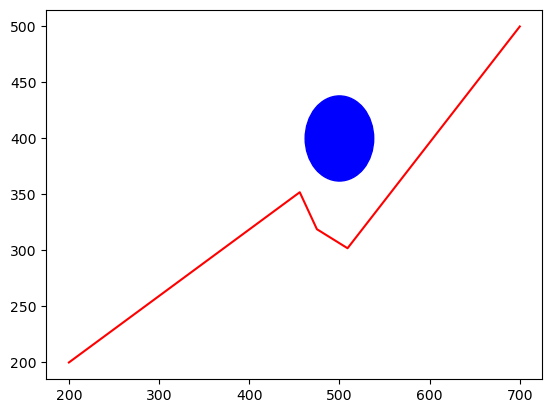

In [121]:

from RRTBasePy import RRTGraph
import matplotlib.pyplot as plt
import time
import random

def main():
    dimensions = (900, 600)
    start = (200, 200)
    goal = (700, 500)
    obstacles = [([500,400],38)]
    iteration = 0

    graph = RRTGraph(start, goal, dimensions, obstacles)

    while (not graph.path_to_goal()):
        rint = random.randint(0, 100)

        if graph.directPath(goal):
            continue

        if rint < 75:
            X, Y, Parent = graph.bias(goal)
            pass
        else:
            X, Y, Parent = graph.expand()
            pass
        
        iteration += 1
    #save path in path.txt if not exist create it
    path = graph.getPathCoords()
    f = open("path.txt", "w")
    for i in range(len(path)):
        f.write(str(path[i][0]) + " " + str(path[i][1]) + "\n")
    f.close()
    # plot path and obstacles
    plt.plot([x[0] for x in path], [x[1] for x in path], 'r-')
    for i in range(len(obstacles)):
        circle = plt.Circle((obstacles[i][0][0], obstacles[i][0][1]), obstacles[i][1], color='b')
        plt.gcf().gca().add_artist(circle)
    plt.show()

    return True, path

result = False
t1 = time.time()
while not result:
    elapsed = time.time() - t1
    if elapsed > 1:
        break
    try:
        result,path = main()
    except Exception as e:
        print(e)
        pass

[[700.00049471 500.00117312]
 [508.86656877 301.65499968]
 [475.48559095 320.2985328 ]
 [455.25970519 349.92753152]
 [424.59374593 334.7619625 ]
 [391.79024991 313.32379585]
 [359.93150739 294.8128046 ]
 [328.0608547  276.18846085]
 [296.05097091 257.15239357]
 [263.98579019 237.95492301]
 [231.9492467  218.84636943]
 [200.02527464 200.07705307]]


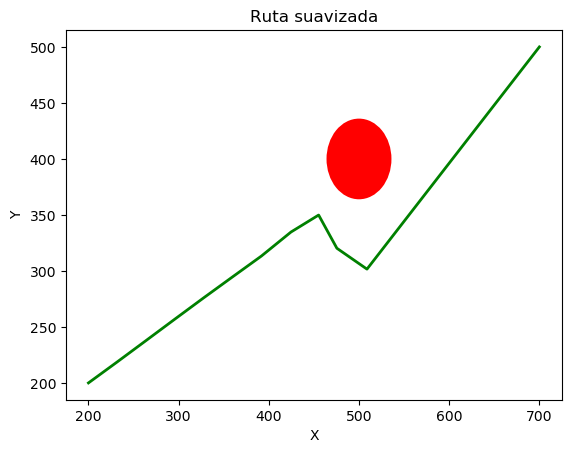

In [137]:
from scipy import interpolate
import numpy as np


def smooth(path, resolution):
    # smooth path using derivates:

    # first derivative
    path_deriv = np.diff(path, axis=0)
    path_deriv = np.vstack((path_deriv, path_deriv[-1]))

    # second derivative
    path_deriv2 = np.diff(path_deriv, axis=0)
    path_deriv2 = np.vstack((path_deriv2, path_deriv2[-1]))

    # smooth path
    path_smooth = path + resolution*path_deriv + 0.5*resolution**2*path_deriv2

    return path_smooth

def smooth_path(path, smoothness, obstacles):
    # Convertir la lista de tuplas a un array NumPy
    path = np.array(path)

    # Generar los puntos de control para los B-splines
    t = np.linspace(0, 1, len(path))
    tck, u = interpolate.splprep([path[:, 0], path[:, 1]], s=smoothness)

    # Evaluar la curva suavizada utilizando B-splines
    smoothed_path = np.column_stack(interpolate.splev(u, tck))
    for obstacle in obstacles:
        x, y = obstacle
        dist = np.sqrt((smoothed_path[:, 0] - x)
                       ** 2 + (smoothed_path[:, 1] - y)**2)
        if np.any(dist < 0.5):  # Distancia mínima de separación
            return None  # Ruta inválida, retorna None

    return smoothed_path

path_smooth = smooth_path(
        path, smoothness=len(path)-1, obstacles=[[500,400]])
print(path_smooth)
fig, ax = plt.subplots()

obstacles = [[500,400]]
# Graficar los obstáculos
for obstacle in obstacles:
    circle = plt.Circle(obstacle, radius=18*2+2, fc='r')
    ax.add_patch(circle)

# Graficar la ruta propuesta
x_values = [point[0] for point in path_smooth]
y_values = [point[1] for point in path_smooth]
ax.plot(x_values, y_values, 'g', linewidth=2)

# Configurar los límites de los ejes
# ax.set_xlim(-450, 450)
# ax.set_ylim(-300, 300)

# Configurar etiquetas
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Ruta suavizada')
plt.show()
